In [660]:
!pip3 install numpy
!pip3 install pyrocko

  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
Exception:
Traceback (most recent call last):
  File "/usr/lib/python3.6/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/lib/python3.6/site-packages/pip/commands/install.py", line 365, in run
    strip_file_prefix=options.strip_file_prefix,
  File "/usr/lib/python3.6/site-packages/pip/req/req_set.py", line 789, in install
    **kwargs
  File "/usr/lib/python3.6/site-packages/pip/req/req_install.py", line 854, in install
    strip_file_prefix=strip_file_prefix
  File "/usr/lib/python3.6/site-packages/pip/req/req_install.py", line 1069, in move_wheel_files
    strip_file_prefix=strip_file_prefix,
  File "/usr/lib/python3.6/site-packages/pip/wheel.py", line 345, in move_wheel_files
    clobber(source, lib_dir, True)
  File "/usr/lib/python3.6/site-packages/pip/wheel.py"

In [402]:
import pyocto
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from collections import Counter

In [656]:
# Import the velocity model from https://colab.research.google.com/github/yetinam/pyocto/blob/main/examples/02_velocity_models.ipynb#scrollTo=1c52ed9e-d9c1-4fa6-a549-de702bc9d439
!wget https://github.com/yetinam/pyocto/raw/main/tests/data/graeber.csv

--2023-12-27 14:27:56--  https://github.com/yetinam/pyocto/raw/main/tests/data/graeber.csv
Resolving github.com (github.com)... 20.29.134.23
Connecting to github.com (github.com)|20.29.134.23|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yetinam/pyocto/main/tests/data/graeber.csv [following]
--2023-12-27 14:27:56--  https://raw.githubusercontent.com/yetinam/pyocto/main/tests/data/graeber.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395 [text/plain]
Saving to: ‘graeber.csv’

graeber.csv         100%[===================>]     395  --.-KB/s    in 0s      

2023-12-27 14:27:57 (64.2 MB/s) - ‘graeber.csv’ saved [395/395]



## Input Data

In [798]:
picks = pd.read_csv("~/notebooks/data/phase_association/picks_first_half",index_col=0)
stations = pd.read_csv("~/notebooks/data/phase_association/stations_first_half",index_col=0)

In [799]:
picks

,station,phase,time
0,FS09B,P,2012-10-01T00:04:09.141700Z
1,FS09B,P,2012-10-01T00:36:41.601700Z
2,FS09B,P,2012-10-01T00:55:43.061700Z
3,FS09B,P,2012-10-01T01:16:07.681700Z
4,FS09B,P,2012-10-01T01:41:37.561700Z
...,...,...,...
1219,G25B,P,2012-10-14T04:50:49.077500Z
1220,G25B,P,2012-10-14T04:51:20.781500Z
1221,G25B,P,2012-10-14T04:56:46.781500Z
1222,G25B,P,2012-10-14T04:58:18.253500Z


  ## Velocoty Models

In [800]:
velocity_model = pyocto.VelocityModel0D(
    p_velocity=7.0,
    s_velocity=4.0,
    tolerance=2.0,
)

In [796]:
?pyocto.OctoAssociator.from_area

## Create a 1D velocity model

In [769]:
layers = pd.read_csv("graeber.csv")
layers

,depth,vp,vp_grad,vs,vs_grad,x,y
0,0.0,6.1,0.00,3.6,0.00,1.0,0.0
1,10.0,6.1,0.03,3.6,0.02,1.0,0.0
2,20.0,6.4,0.01,3.8,0.01,1.0,0.0
3,30.0,6.5,0.06,3.8,0.04,1.0,0.0
4,40.0,7.1,0.00,4.2,0.00,1.0,0.0
5,50.0,7.1,0.02,4.2,0.01,1.0,0.0
6,60.0,7.3,0.06,4.3,0.04,1.0,0.0
7,70.0,7.9,0.02,4.7,0.01,1.0,0.0
8,80.0,8.1,0.04,4.8,0.02,1.0,0.0
9,90.0,8.5,0.00,5.1,0.00,1.0,0.0


In [770]:
model_path = "velocity_model"
pyocto.VelocityModel1D.create_model(layers, 1., 400, 250, model_path)

In [771]:
velocity_model_1d = pyocto.VelocityModel1D(model_path, tolerance=2.0)

## The OctoAssociator class

In [812]:
associator = pyocto.OctoAssociator.from_area(
    lat=(40, 43.5),
    lon=(-126.5, -123),
    zlim=(0, 50),
    time_before=300,
    velocity_model=velocity_model,
    n_picks=3,
    n_p_picks=2,
    n_s_picks=1,
    n_p_and_s_picks=1,
)

In [802]:
associator.crs

<Projected CRS: +proj=tmerc +lat_0=41.75 +lon_0=-124.75 +units=km  ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [803]:
associator.transform_stations(stations)
stations

,id,longitude,latitude,elevation,x,y,z
0,FS09B,-124.808502,40.438702,-2161.0,-4.963595,-145.625525,2.161
1,FS13B,-124.806503,40.493099,-2332.0,-4.790124,-139.585196,2.332
2,G10B,-125.553299,40.677898,-2936.0,-67.913996,-118.755232,2.936
3,G19B,-125.773598,41.307400,-3071.0,-85.719842,-48.651523,3.071
4,G25B,-124.586098,41.919899,-430.0,13.596424,18.883688,0.430


## Convert the timestamps to floats

In [804]:
picks["time"] = picks["time"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

In [805]:
picks["time"] = picks["time"].apply(lambda x: x.timestamp())
picks

,station,phase,time
0,FS09B,P,1.349050e+09
1,FS09B,P,1.349052e+09
2,FS09B,P,1.349053e+09
3,FS09B,P,1.349054e+09
4,FS09B,P,1.349056e+09
...,...,...,...
1219,G25B,P,1.350190e+09
1220,G25B,P,1.350190e+09
1221,G25B,P,1.350191e+09
1222,G25B,P,1.350191e+09


In [806]:
type(1.349050e+09)

float

## Delete unnecessary columns

In [807]:
# picks.drop(columns="Unnamed: 0", inplace=True)
# picks

In [808]:
# stations.drop(columns="Unnamed: 0", inplace=True)
# stations

## Apply  the associator

In [813]:
events, assignments = associator.associate(picks, stations)

In [814]:
events

,idx,time,x,y,z,picks
0,0,1.349090e+09,-43.782227,-129.937311,2.734375,3
1,1,1.349095e+09,-15.761602,-191.672562,25.390625,3
2,2,1.349107e+09,34.442019,-163.472509,1.953125,3
3,3,1.349107e+09,0.583763,-142.131929,1.953125,3
4,4,1.349112e+09,-127.844104,-104.785913,30.078125,4


In [815]:
Counter(events['picks'])

Counter({3: 4, 4: 1})

In [816]:
associator.transform_events(events)
events["time"] = events["time"].apply(datetime.datetime.fromtimestamp, tz=datetime.timezone.utc)
events

,idx,time,x,y,z,picks,latitude,longitude,depth
0,0,2012-10-01 11:20:42.479977+00:00,-43.782227,-129.937311,2.734375,3,40.578838,-125.267101,2.734375
1,1,2012-10-01 12:32:10.595434+00:00,-15.761602,-191.672562,25.390625,3,40.023878,-124.934640,25.390625
2,2,2012-10-01 16:03:36.532490+00:00,34.442019,-163.472509,1.953125,3,40.277285,-124.345026,1.953125
3,3,2012-10-01 16:03:41.466901+00:00,0.583763,-142.131929,1.953125,3,40.470178,-124.743116,1.953125
4,4,2012-10-01 17:18:00.748478+00:00,-127.844104,-104.785913,30.078125,4,40.796542,-126.264833,30.078125


In [817]:
assignments

,event_idx,pick_idx,residual,station,phase,time
0,0,56,0.339889,FS09B,P,1.349090e+09
1,0,154,-0.246488,FS09B,S,1.349090e+09
2,0,1005,-0.093401,G10B,P,1.349090e+09
3,1,59,-0.001292,FS09B,P,1.349095e+09
4,1,161,0.013040,FS09B,S,1.349095e+09
5,1,1006,-0.011749,G10B,P,1.349095e+09
6,2,70,-0.610679,FS09B,P,1.349107e+09
7,3,70,-0.302213,FS09B,P,1.349107e+09
8,2,172,0.014404,FS09B,S,1.349107e+09
9,2,1013,0.596275,G10B,P,1.349107e+09


In [819]:
pd.merge(events, assignments, left_on="idx", right_on="event_idx", suffixes=("", "_pick"))

,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick
0,0,2012-10-01 11:20:42.479977+00:00,-43.782227,-129.937311,2.734375,3,40.578838,-125.267101,2.734375,0,56,0.339889,FS09B,P,1.349090e+09
1,0,2012-10-01 11:20:42.479977+00:00,-43.782227,-129.937311,2.734375,3,40.578838,-125.267101,2.734375,0,154,-0.246488,FS09B,S,1.349090e+09
2,0,2012-10-01 11:20:42.479977+00:00,-43.782227,-129.937311,2.734375,3,40.578838,-125.267101,2.734375,0,1005,-0.093401,G10B,P,1.349090e+09
3,1,2012-10-01 12:32:10.595434+00:00,-15.761602,-191.672562,25.390625,3,40.023878,-124.934640,25.390625,1,59,-0.001292,FS09B,P,1.349095e+09
4,1,2012-10-01 12:32:10.595434+00:00,-15.761602,-191.672562,25.390625,3,40.023878,-124.934640,25.390625,1,161,0.013040,FS09B,S,1.349095e+09
5,1,2012-10-01 12:32:10.595434+00:00,-15.761602,-191.672562,25.390625,3,40.023878,-124.934640,25.390625,1,1006,-0.011749,G10B,P,1.349095e+09
6,2,2012-10-01 16:03:36.532490+00:00,34.442019,-163.472509,1.953125,3,40.277285,-124.345026,1.953125,2,70,-0.610679,FS09B,P,1.349107e+09
7,2,2012-10-01 16:03:36.532490+00:00,34.442019,-163.472509,1.953125,3,40.277285,-124.345026,1.953125,2,172,0.014404,FS09B,S,1.349107e+09
8,2,2012-10-01 16:03:36.532490+00:00,34.442019,-163.472509,1.953125,3,40.277285,-124.345026,1.953125,2,1013,0.596275,G10B,P,1.349107e+09
9,3,2012-10-01 16:03:41.466901+00:00,0.583763,-142.131929,1.953125,3,40.470178,-124.743116,1.953125,3,70,-0.302213,FS09B,P,1.349107e+09


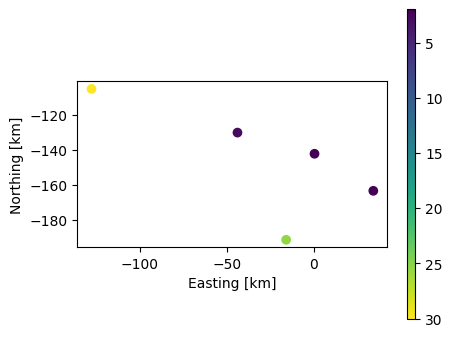

In [820]:
# The parameters in the associator class: n_picks=2,n_p_picks=1,n_s_picks=1,n_p_and_s_picks=1
fig = plt.figure(figsize=(4, 8))
ax = fig.add_subplot()
ax.set_aspect("equal")

# ax.scatter(events["x"], events["y"], c=events["z"])
ax.set_xlabel("Easting [km]")
ax.set_ylabel("Northing [km]")
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])
cb1 = fig.colorbar(ax.scatter(events["x"], events["y"], c=events["z"],cmap='viridis'), cax=cax)
cb1.ax.invert_yaxis()

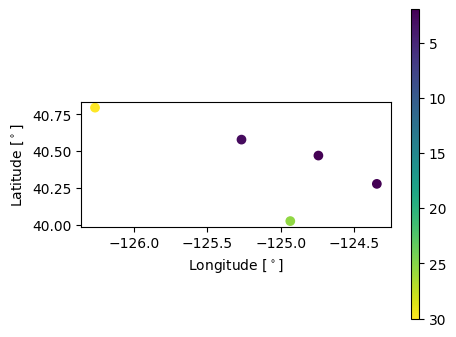

In [821]:
# The parameters in the associator class: n_picks=2,n_p_picks=1,n_s_picks=1,n_p_and_s_picks=1
fig = plt.figure(figsize=(4, 8))
ax = fig.add_subplot()
ax.set_aspect("equal")

ax.set_xlabel("Longitude [$^\circ$]")
ax.set_ylabel("Latitude [$^\circ$]")
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])
cb1 = fig.colorbar(ax.scatter(events["longitude"], events["latitude"], c=events["z"],cmap='viridis'), cax=cax)
cb1.ax.invert_yaxis()

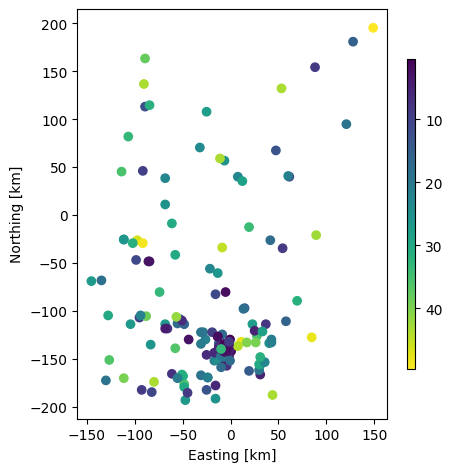

In [655]:
# The parameters in the associator class: n_picks=2,n_p_picks=1,n_s_picks=1,n_p_and_s_picks=1
fig = plt.figure(figsize=(4, 8))
ax = fig.add_subplot()
ax.set_aspect("equal")

# ax.scatter(events["x"], events["y"], c=events["z"])
ax.set_xlabel("Easting [km]")
ax.set_ylabel("Northing [km]")
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])
cb1 = fig.colorbar(ax.scatter(events["x"], events["y"], c=events["z"],cmap='viridis'), cax=cax)
cb1.ax.invert_yaxis()
